In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\REA\AppData\Roaming\nltk_data...


True

In [6]:
df = pd.read_csv("IPL sample data.csv")
df = df.dropna(axis=1, how='all').copy()
print(" IPL Dataset Loaded")

 IPL Dataset Loaded


In [7]:
df['text'] = df.astype(str).agg(' '.join, axis=1)

In [8]:
text_df = df[['text']].copy()
print(" Text Data Prepared")
display(text_df.head())

 Text Data Prepared


,text
0,Throw Y-> Good Throw N-> Bad throw DH-> Dirct ...
1,"Runs ""+"" stands for runs saved ""-"" stands for ..."
2,nan nan nan nan nan nan nan nan nan nan nan na...
3,nan Match No. Innings Teams Player Name BallCo...
4,nan IPL2367 1 Delhi Capitals Rilee russouw 0.1...


In [9]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
text_df['compound'] = text_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [11]:
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

text_df['sentiment'] = text_df['compound'].apply(label_sentiment)
print("\n Sentiment Classification Done")
display(text_df.head())


 Sentiment Classification Done


,text,compound,sentiment
0,Throw Y-> Good Throw N-> Bad throw DH-> Dirct ...,-0.4215,Negative
1,"Runs ""+"" stands for runs saved ""-"" stands for ...",0.4215,Positive
2,nan nan nan nan nan nan nan nan nan nan nan na...,0.0000,Neutral
3,nan Match No. Innings Teams Player Name BallCo...,-0.2960,Negative
4,nan IPL2367 1 Delhi Capitals Rilee russouw 0.1...,0.0000,Neutral


C:\Users\REA\AppData\Local\Temp\ipykernel_8592\4155660986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=text_df, palette='coolwarm')


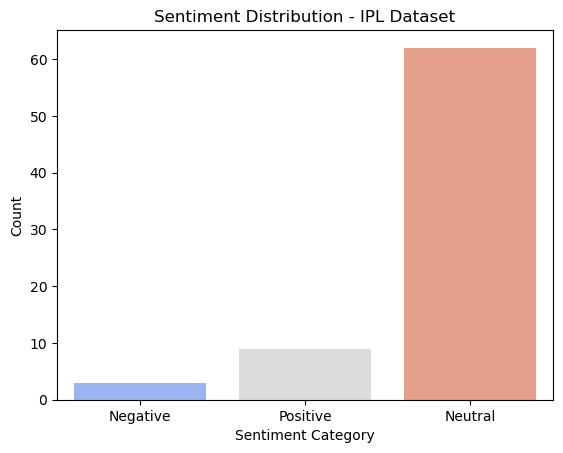

In [12]:
sns.countplot(x='sentiment', data=text_df, palette='coolwarm')
plt.title('Sentiment Distribution - IPL Dataset')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# If detection fails, fall back to manual list (safe default)
if not action_cols:
    # common names in your sample: adapt if your normalized columns differ
    fallback = ['pick','clean_pick','fumble','catch','dropped_catch','stumping']
    action_cols = [c for c in fallback if c in df.columns]
    print("Fallback action columns:", action_cols)

if not action_cols:
    raise RuntimeError("No action columns detected. Inspect df.columns and update action_keywords.")
